## Final Project Submission

Please fill out:
* Student name:   **VICTOR MAWIRA MICHENI**
* Student pace:   **full time**
* Scheduled project review date/time: **10 th March 2023**
* Instructor name: **Antonny Muiko**
* Blog post URL:


# Business Understanding

# Data  Undersatanding

# Data Preparation

* This step is where we look for missing values, Duplicates

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data cleaning

## a.  bom.movie_gross.csv.

In [286]:
# extracting the data and display head

df_bom_movie = pd.read_csv('Data/bom.movie_gross.csv')
df_bom_movie.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [287]:
# creating a pivot table


In [288]:
# column info
df_bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [289]:
""" 
From the column information, there are 5 columns and 3387 rows.
title column has no missing value, studio has 5 mising values, domestic_gross has 28 missing values,foreign_ gross has 1350 and year has no missing value."""

' \nFrom the column information, there are 5 columns and 3387 rows.\ntitle column has no missing value, studio has 5 mising values, domestic_gross has 28 missing values,foreign_ gross has 1350 and year has no missing value.'

In [290]:
#Checking for Duplicates.
df_bom_movie.duplicated().value_counts()

False    3387
dtype: int64

In [291]:
# checking Nan Values
df_bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [292]:
#Confirming Nan Value.
df_bom_movie.loc[df_bom_movie['foreign_gross'].isna() == True]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


* Eliminating NaN values in Foreign_gross column

In [293]:
# Removing ubnormal characters and converting to float.
df_bom_movie['foreign_gross']= df_bom_movie['foreign_gross'].replace(',' , '' , regex=True).astype(float)

In [294]:
df_bom_movie['foreign_gross'].describe()

count    2.037000e+03
mean     7.487281e+07
std      1.374106e+08
min      6.000000e+02
25%      3.700000e+06
50%      1.870000e+07
75%      7.490000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

<Axes: ylabel='Frequency'>

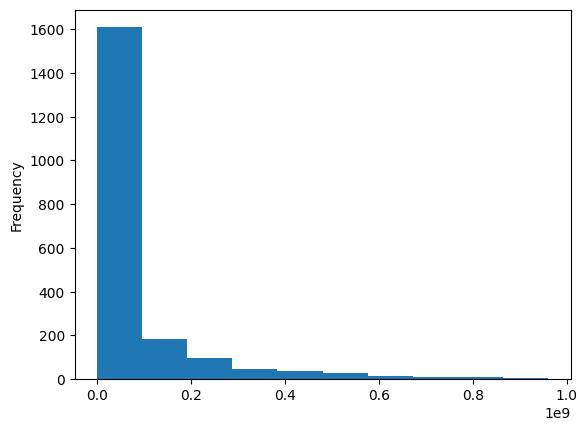

In [295]:
df_bom_movie['foreign_gross'].plot(kind='hist')

In [296]:
# try filling with median
median = df_bom_movie['foreign_gross'].median()
a = df_bom_movie['foreign_gross'].fillna(value = median)

In [297]:
a.describe()

count    3.387000e+03
mean     5.248329e+07
std      1.100461e+08
min      6.000000e+02
25%      1.160000e+07
50%      1.870000e+07
75%      2.915000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

<Axes: ylabel='Frequency'>

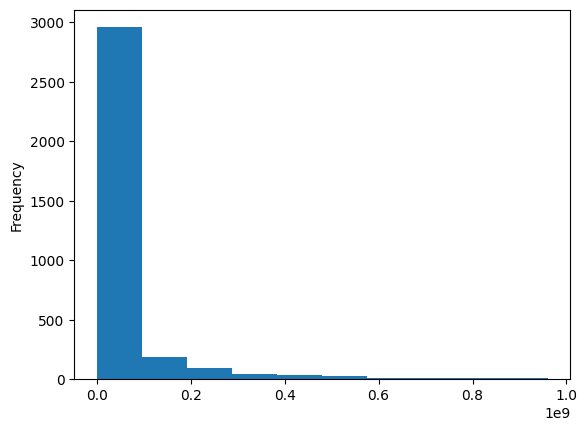

In [298]:
a.plot(kind='hist')

In [299]:
b = df_bom_movie['foreign_gross'].fillna(df_bom_movie['foreign_gross'].mean())
b.describe()

count    3.387000e+03
mean     7.487281e+07
std      1.065530e+08
min      6.000000e+02
25%      1.160000e+07
50%      7.487281e+07
75%      7.487281e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

<Axes: ylabel='Frequency'>

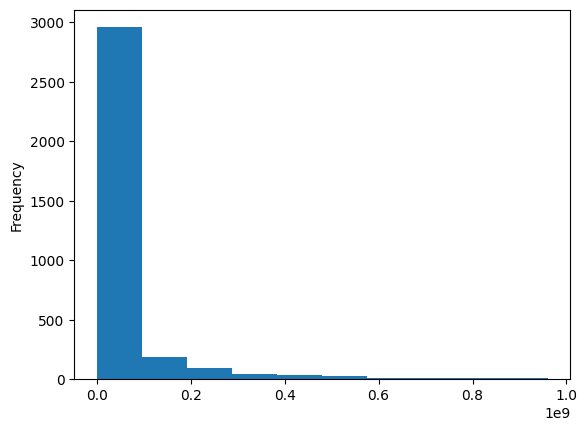

In [300]:
b.plot(kind='hist')

In [301]:
c= df_bom_movie['foreign_gross'].dropna()

In [302]:
c.describe()

count    2.037000e+03
mean     7.487281e+07
std      1.374106e+08
min      6.000000e+02
25%      3.700000e+06
50%      1.870000e+07
75%      7.490000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

<Axes: ylabel='Frequency'>

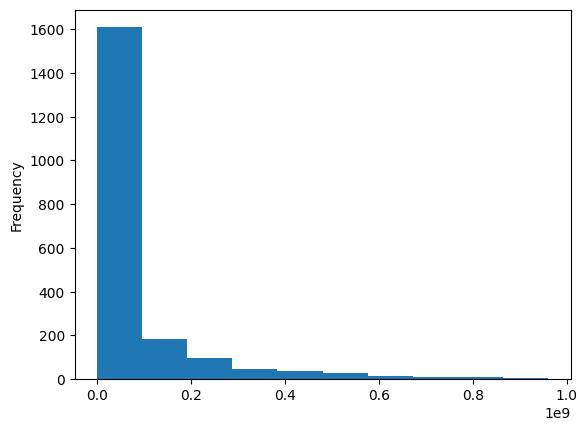

In [303]:
c.plot(kind='hist')

Therefore, we see that dropping the rows had no impact on the variation and mean, while filling with the median lowered the variation and the mean. However, the variation for data filled with median is larger then that of data filled by the mean.Therefore, we chose to fill with median as it reserves data and does not cause a very large drop in variation.

In [304]:
df_bom_movie['foreign_gross'].fillna(df_bom_movie['foreign_gross'].median(), inplace=True)

In [305]:
# checking the new info
df_bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


* eliminating nan values in domestic_gross

In [306]:
df_bom_movie['domestic_gross'].isna().sum()

28

In [307]:
df_bom_movie.loc[df_bom_movie['domestic_gross'].isna() == True]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010
302,White Lion,Scre.,NaN,99600.0,2010
306,Badmaash Company,Yash,NaN,64400.0,2010
327,Aashayein (Wishes),Relbig.,NaN,3800.0,2010
537,Force,FoxS,NaN,4800000.0,2011
713,Empire of Silver,NeoC,NaN,19000.0,2011
871,Solomon Kane,RTWC,NaN,19600000.0,2012
928,The Tall Man,Imag.,NaN,5200000.0,2012
933,Keith Lemon: The Film,NaN,NaN,4000000.0,2012


<Axes: ylabel='Frequency'>

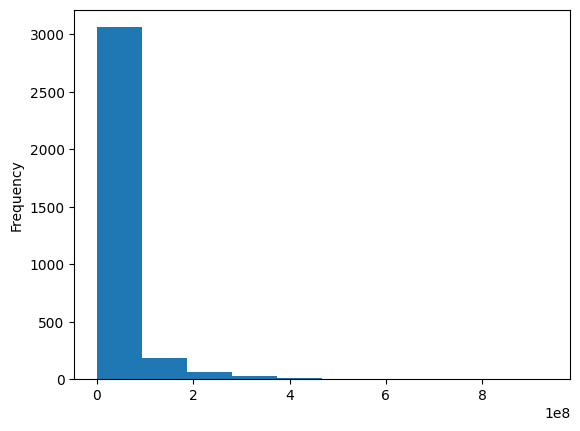

In [308]:
#histogram before filling missing values.
df_bom_movie['domestic_gross'].plot(kind='hist')

<Axes: ylabel='Frequency'>

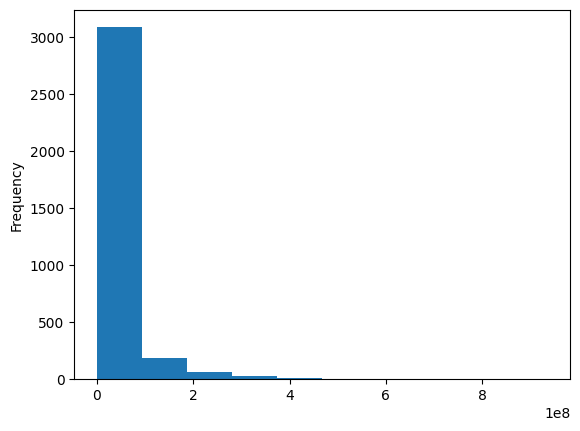

In [309]:
#filling missing values with median
df_bom_movie['domestic_gross'].fillna(df_bom_movie['domestic_gross'].median(), inplace=True)
df_bom_movie['domestic_gross'].plot(kind='hist')

* dealing with missing data from studio

In [310]:
#since the data set under study is a string, the column is in turn dropped all together.
df_bom_movie.dropna(inplace=True)

In [311]:
df_bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [339]:
# The clean data for the boom movie.
df_bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


## b. im.db

In [312]:
import sqlite3
conn = sqlite3.connect('Data/im.db')

# Check tables present in the data base

table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


i. Movie_basics

In [313]:
#selecting the movie_basics table
db_data = pd.read_sql("""SELECT * FROM movie_basics""",conn)
db_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [314]:
# checking information of the Movie_basics table
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [315]:
# check missing values in the movie_basics table
db_data.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

From the above table it is notable that there are missing values present in the DataFrame.

In [316]:
#run time minutes information
db_data['runtime_minutes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 146144 entries, 0 to 146143
Series name: runtime_minutes
Non-Null Count   Dtype  
--------------   -----  
114405 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [317]:
db_data['runtime_minutes'].describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [318]:
#histogram plot for the runtime minutes
db_data['runtime_minutes'].median()

87.0

In [319]:
a = db_data['runtime_minutes'].fillna(db_data['runtime_minutes'].median())
a.describe()

count    146144.000000
mean         86.363758
std         147.191650
min           1.000000
25%          75.000000
50%          87.000000
75%          95.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [320]:
b = db_data['runtime_minutes'].fillna(db_data['runtime_minutes'].mean())
b.describe()

count    146144.000000
mean         86.187247
std         147.191268
min           1.000000
25%          75.000000
50%          86.187247
75%          95.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [321]:
c =db_data['runtime_minutes'].dropna()
c.describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

From the finding mean and median have same effect on the new standard deviation. Therefore, we replace the missing values in the run_time with the median.

In [322]:
db_data['runtime_minutes'].describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [323]:
db_data['runtime_minutes'].fillna(db_data['runtime_minutes'].median(),inplace=True)

In [324]:
db_data.isna().sum()

movie_id              0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

Since,there is no mean or median in the genre and original title column, lets drop the null values in the genre.  

In [330]:
# dropping all the null values.
db_data.dropna(inplace=True)
db_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  140734 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [331]:
# checking the presence of duplicates in db_data DataFrame
db_data.duplicated().sum()

#there are no duplicates available in our DataFrame.

0

In [335]:
# the clean data frame for db_data 
db_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


ii. Movie_Ratings

In [340]:
db_movieRating = pd.read_sql("""
SELECT *
FROM movie_ratings;""",conn)

In [342]:
#Displaying the head for movie rating
db_movieRating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [346]:
db_movieRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [343]:
# Checking for missing data
db_movieRating.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

Since it doesn't have any missing data, lets proceed to check on the presence of duplicates.

In [345]:
db_movieRating.duplicated().sum()

0

Since, no duplicates are available. the dataframe for movie rating will be;

In [348]:
#movie rating Frame head
db_movieRating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
